IMPORTING LIBRARIES:

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_auc_score, roc_curve

DATA COLLECTING AND PROCESSING:

In [130]:
#LOAD THE DATA FROM CSV FILE TO PANDAS DATAFRAMES:
titanic_data = pd.read_csv("train.csv")
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


PRINTING THE HEAD AND TAIL:

In [131]:
#HEAD- FIRST 5 ROWS:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [132]:
#TAIL - LAST 5 ROWS
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


GETTING SOME INFORMATION ABOUT THE DATA:

In [133]:
#No. of rows and column
titanic_data.shape

(891, 12)

In [134]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


CHECKING NULL VALUES AND HANDLING IT:

In [135]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [136]:
#DROP A Cabin COLUMN FROM THE DATAFRAME:
titanic_data=titanic_data.drop(columns='Cabin',axis=1)

In [137]:
#REPLACING THE MISSING VALUES IN AGE COLUMN WITH MEAN VALUES:
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

In [138]:
#FINDING THE MODE VALUE OF 'EMBARKED' COLUMN:
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [139]:
print(titanic_data['Embarked'].mode()[0])
#replacing the missing values in'Embarked' column with mode:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)
titanic_data

S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


DROPING THE NAME AND TICKET COLUMN:

In [140]:
titanic_data.drop(columns=['Name','Ticket'],inplace=True)

In [141]:
titanic_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


<Axes: >

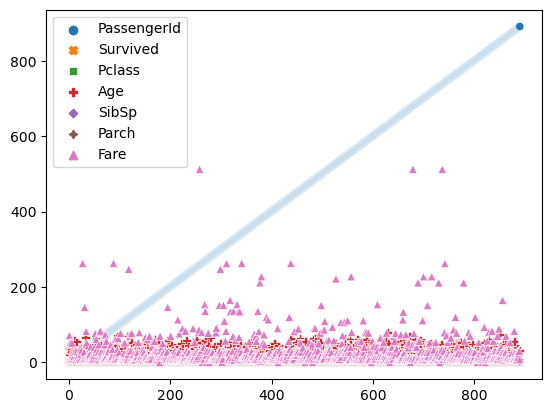

In [142]:
#scatterplot of  wholetitanic_data
sns.scatterplot(titanic_data)

FINDING CORRELATION:

In [143]:
#converting data to numeric value:
titanic_data['Sex']=titanic_data['Sex'].astype('category')
titanic_data['Sex']=titanic_data['Sex'].cat.codes
titanic_data['Embarked']=titanic_data['Embarked'].astype('category')
titanic_data['Embarked']=titanic_data['Embarked'].cat.codes

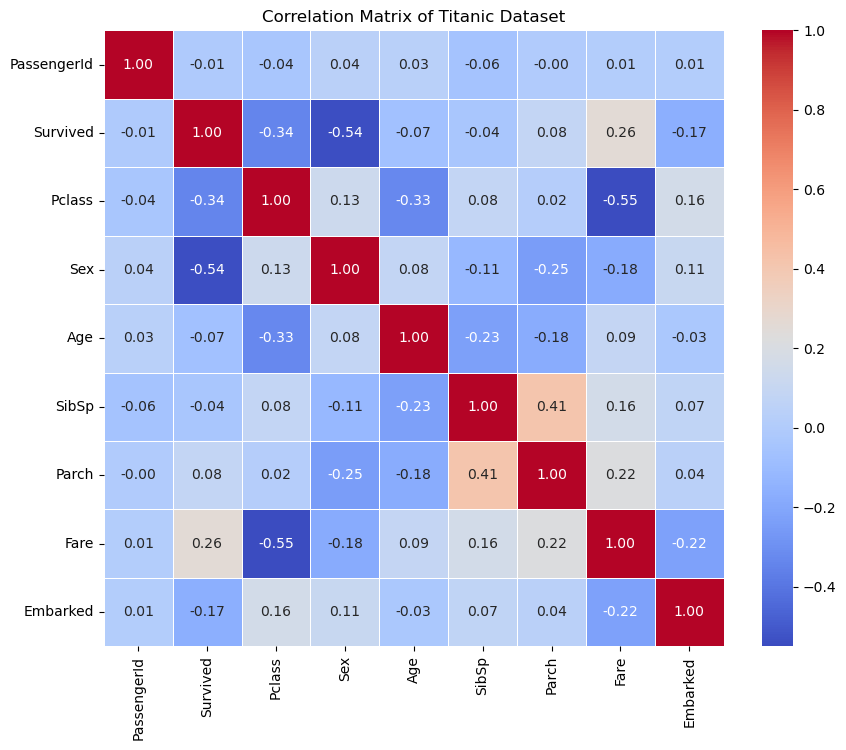

In [144]:
correlation_matrix = titanic_data.corr()
correlation_matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Titanic Dataset')
plt.show()

TRAINING AND TESTING THE DATA:


In [145]:
X=titanic_data.drop(columns='Survived')
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.000000,1,0,7.2500,2
1,2,1,0,38.000000,1,0,71.2833,0
2,3,3,0,26.000000,0,0,7.9250,2
3,4,1,0,35.000000,1,0,53.1000,2
4,5,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,13.0000,2
887,888,1,0,19.000000,0,0,30.0000,2
888,889,3,0,29.699118,1,2,23.4500,2
889,890,1,1,26.000000,0,0,30.0000,0


In [146]:
y=titanic_data['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [147]:
#train_test_splitting:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=21)

In [148]:
print(X.shape,X_train.shape,X_test.shape)

(891, 8) (623, 8) (268, 8)


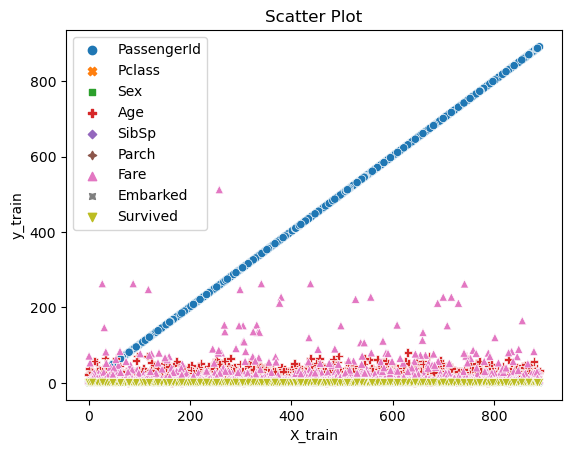

In [149]:
# Concatenate X_train and y_train into a single DataFrame
train_data = pd.concat([X_train, y_train], axis=1)

# Create a scatter plot
sns.scatterplot(data=train_data)
plt.title('Scatter Plot')
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.show()


In [150]:
logreg=LogisticRegression()
logreg.fit(X_train, y_train)

c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

ACCURACY:

In [151]:
#TRAINING PREDICTION
Train_prediction=logreg.predict(X_train)
Train_prediction

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,

In [152]:
logreg.score(X_train,y_train)
training_data_accuracy = accuracy_score (y_train,Train_prediction)
print('Accuracy score of training data:',training_data_accuracy)


Accuracy score of training data: 0.78330658105939


c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

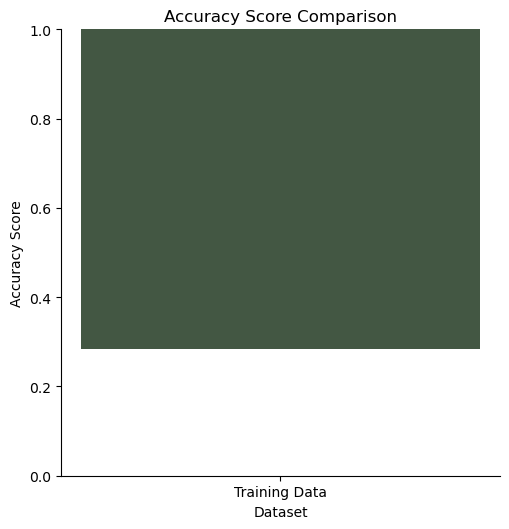

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have calculated the accuracy scores for training and test data
training_data_accuracy = accuracy_score(y_train, Train_prediction)

# Plotting the accuracy scores
plt.figure(figsize=(8, 6))
categories = ['Training Data']
accuracy_scores = [training_data_accuracy]

sns.displot(x=categories, y=accuracy_scores, color='lightgreen')
plt.xlabel('Dataset')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score Comparison')
plt.ylim(0, 1)  # Setting y-axis limit to 0 to 1 for accuracy score
plt.show()



In [154]:
#TESTING
Test_prediction=logreg.predict(X_test)
Test_prediction

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1], dtype=int64)

In [155]:
test_data_accuracy = accuracy_score(y_test,Test_prediction)
print('Accuracy score of the test data: ', test_data_accuracy)

Accuracy score of the test data:  0.8022388059701493


c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

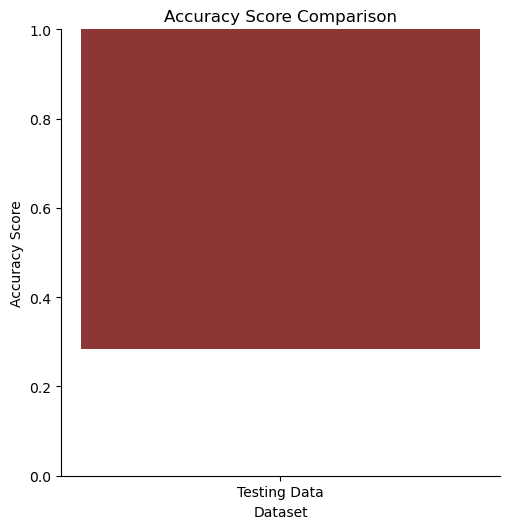

In [156]:
# Assuming you have calculated the accuracy scores for training and test data
test_data_accuracy = accuracy_score(y_test, Test_prediction)

# Plotting the accuracy scores
plt.figure(figsize=(8, 6))
categories = ['Testing Data']
accuracy_scores = [training_data_accuracy]

sns.displot(x=categories, y=accuracy_scores, color='red')
plt.xlabel('Dataset')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score Comparison')
plt.ylim(0, 1)  # Setting y-axis limit to 0 to 1 for accuracy score
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_126044\775920644.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(x=categories, y=accuracy_scores, palette=['lightgreen', 'red'])
c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x600 with 0 Axes>

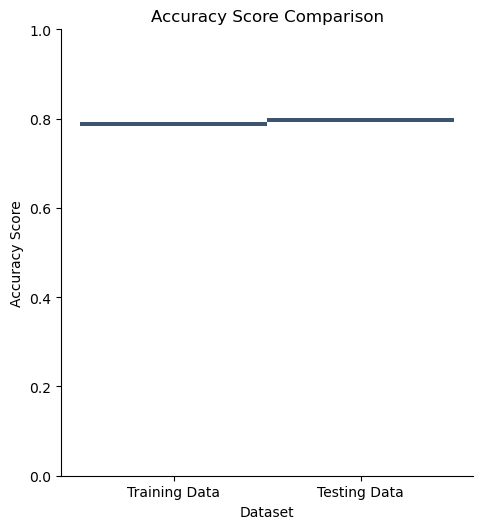

In [157]:
#comparison of train_data and test_data:

# Assuming you have calculated the accuracy scores for training and test data
training_data_accuracy = accuracy_score(y_train, Train_prediction)
testing_data_accuracy = accuracy_score(y_test, Test_prediction)

# Plotting the accuracy scores
plt.figure(figsize=(8, 6))
categories = ['Training Data', 'Testing Data']
accuracy_scores = [training_data_accuracy, testing_data_accuracy]

sns.displot(x=categories, y=accuracy_scores, palette=['lightgreen', 'red'])
plt.xlabel('Dataset')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score Comparison')
plt.ylim(0, 1)  # Setting y-axis limit to 0 to 1 for accuracy score
plt.show()


EVALUATION [TRAINING PREDICTION]:

In [158]:
#Accuracy:
accuracy = accuracy_score(y_train, Train_prediction)
print("Accuracy:", accuracy)

Accuracy: 0.78330658105939


In [159]:
#Precision:
train_precision = precision_score(y_train, Train_prediction)
print("Precision on training data:", train_precision)

Precision on training data: 0.7403846153846154


In [160]:
# Recall:
train_recall = recall_score(y_train, Train_prediction)
print("Recall on training data:", train_recall)

Recall on training data: 0.6553191489361702


In [161]:
# F1-score
train_f1 = f1_score(y_train, Train_prediction)
print("F1-score on training data:", train_f1)

F1-score on training data: 0.6952595936794583


In [162]:
# 5. Confusion Matrix
train_conf_matrix = confusion_matrix(y_train, Train_prediction)
print("Confusion Matrix on training data:")
print(train_conf_matrix)

Confusion Matrix on training data:
[[334  54]
 [ 81 154]]


EVALUATION [TESTING PREDICTION]

In [163]:
# Accuracy:
test_accuracy = accuracy_score(y_test, Test_prediction)
print("Accuracy on testing data:", test_accuracy)

Accuracy on testing data: 0.8022388059701493


In [164]:
# Precision:
test_precision = precision_score(y_test, Test_prediction)
print("Precision on testing data:", test_precision)

Precision on testing data: 0.7934782608695652


In [165]:
# Recall:
test_recall = recall_score(y_test, Test_prediction)
print("Recall on testing data:", test_recall)

Recall on testing data: 0.6822429906542056


In [166]:
# F1-score:
test_f1 = f1_score(y_test, Test_prediction)
print("F1-score on testing data:", test_f1)

F1-score on testing data: 0.7336683417085428


ROC AUC Score on testing data: 0.7821152841469785


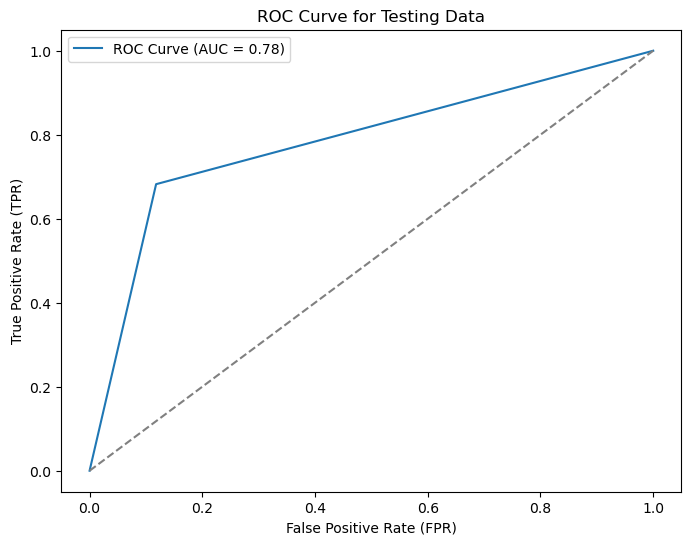

In [167]:
# 6. ROC AUC Score
roc_auc = roc_auc_score(y_test, Test_prediction)
print("ROC AUC Score on testing data:", roc_auc)

# Plotting ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, Test_prediction)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Testing Data')
plt.legend()
plt.show()

GUI

In [168]:
#libraries:
import tkinter as tk
from tkinter import messagebox
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [170]:
import tkinter as tk
from tkinter import messagebox
import pandas as pd
from sklearn.linear_model import LogisticRegression



# Preprocess the data
def preprocess_input(passenger_id, pclass, sex, age, sibsp, parch, fare, embarked):
    sex_encoded = 1 if sex == "male" else 0
    embarked_encoded = 1 if embarked == "S" else (2 if embarked == "C" else 3)  # Assuming "S" is encoded as 1, "C" as 2, and "Q" as 3
    return [[passenger_id, pclass, sex_encoded, age, sibsp, parch, fare, embarked_encoded]]

# Train the logistic regression model
X = titanic_data[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = titanic_data['Survived']
logreg = LogisticRegression()
logreg.fit(X, y)

# Predict survival
def predict_survival():
    try:
        # Extract values from entry widgets
        passenger_id = int(passenger_id_entry.get())
        pclass = int(pclass_entry.get())
        sex = sex_var.get()
        age = float(age_entry.get())
        sibsp = int(sibsp_entry.get())
        parch = int(parch_entry.get())
        fare = float(fare_entry.get())
        embarked = embarked_var.get()

        # Preprocess input data
        input_data = preprocess_input(passenger_id, pclass, sex, age, sibsp, parch, fare, embarked)

        # Make prediction
        prediction = logreg.predict(input_data)

        # Display result
        if prediction[0] == 1:
            messagebox.showinfo("Prediction Result", "Survived")
        else:
            messagebox.showinfo("Prediction Result", "Did not survive")
    except ValueError:
        messagebox.showerror("Error", "Please enter valid values")

# Create the main Tkinter window
root = tk.Tk()
root.title("Titanic Survival Prediction")

# Design the GUI layout
passenger_id_label = tk.Label(root, text="Passenger ID:")
passenger_id_label.grid(row=0, column=0, padx=10, pady=5, sticky="w")
passenger_id_entry = tk.Entry(root)
passenger_id_entry.grid(row=0, column=1, padx=10, pady=5)

pclass_label = tk.Label(root, text="Pclass:")
pclass_label.grid(row=1, column=0, padx=10, pady=5, sticky="w")
pclass_entry = tk.Entry(root)
pclass_entry.grid(row=1, column=1, padx=10, pady=5)

sex_label = tk.Label(root, text="Sex:")
sex_label.grid(row=2, column=0, padx=10, pady=5, sticky="w")
sex_var = tk.StringVar(root)
sex_var.set("male")
sex_dropdown = tk.OptionMenu(root, sex_var, "male", "female")
sex_dropdown.grid(row=2, column=1, padx=10, pady=5)

age_label = tk.Label(root, text="Age:")
age_label.grid(row=3, column=0, padx=10, pady=5, sticky="w")
age_entry = tk.Entry(root)
age_entry.grid(row=3, column=1, padx=10, pady=5)

sibsp_label = tk.Label(root, text="SibSp:")
sibsp_label.grid(row=4, column=0, padx=10, pady=5, sticky="w")
sibsp_entry = tk.Entry(root)
sibsp_entry.grid(row=4, column=1, padx=10, pady=5)

parch_label = tk.Label(root, text="Parch:")
parch_label.grid(row=5, column=0, padx=10, pady=5, sticky="w")
parch_entry = tk.Entry(root)
parch_entry.grid(row=5, column=1, padx=10, pady=5)

fare_label = tk.Label(root, text="Fare:")
fare_label.grid(row=6, column=0, padx=10, pady=5, sticky="w")
fare_entry = tk.Entry(root)
fare_entry.grid(row=6, column=1, padx=10, pady=5)

embarked_label = tk.Label(root, text="Embarked:")
embarked_label.grid(row=7, column=0, padx=10, pady=5, sticky="w")
embarked_var = tk.StringVar(root)
embarked_var.set("S")
embarked_dropdown = tk.OptionMenu(root, embarked_var, "S", "C", "Q")
embarked_dropdown.grid(row=7, column=1, padx=10, pady=5)

predict_button = tk.Button(root, text="Predict Survival", command=predict_survival)
predict_button.grid(row=8, column=0, columnspan=2, pady=10)

# Run the Tkinter event loop
root.mainloop()


c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
